K Newarwst Neighbors is a classification method .
* Training process in this method is different as this is a non-parametric model so for training we only need to store all the data

** Prediction phase is also different:
    1. calculate the distance from x to all the points in your data 
    2. sort the points in your data by increasing distance from x
    3.Predict the majority lable of the "k" clsest points
    
*** by increasing the K we will reduce the noises , this method can be applied to any number of classes 

**** This method is not any good for Large data sets not good with high dimentional data (many features), not goofd for cathegorical features 

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline

In [3]:
dataset=pd.read_csv('Classified Data', index_col=0)

In [4]:
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### PreProcessnig :

To standardise everything from the same skill we use the following method:

In [5]:
from sklearn.preprocessing import StandardScaler

When we are using KNN variables which have a very large scale but we need to standardise all the variables for the same scale.

In [6]:
#we create an instance and we fit it to our dataset:
scaler = StandardScaler()

In [8]:
scaler.fit(dataset.drop('TARGET CLASS',axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

### using the Scaler to do the Transformation :


In [9]:
scaler_feature = scaler.transform(dataset.drop('TARGET CLASS',axis =1))

In [18]:
scaler_feature

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

Ok this array of scaled version of the actual values in the main  Dataset

### Using this scaler_feature variables to recreate the feature data frame

In [21]:
dateset_feat = pd.DataFrame(scaler_feature, columns=dataset.columns[:-1])
dateset_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Cross validation 

In [22]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(scaler_feature,dataset['TARGET CLASS'],
                                                    test_size=0.30)

### Using KNN:

We'll start with k=1.and we will see how to use the elbow method to chose a K value:


In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
pred = knn.predict(X_test)

## Predictions and Evaluations

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(confusion_matrix(y_test,pred))

[[137   9]
 [ 12 142]]


In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       146
           1       0.94      0.92      0.93       154

   micro avg       0.93      0.93      0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## Choosing a K Value:

In [34]:
error_rate = []

# to check different K values 
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    # here we get the mean of error rate
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

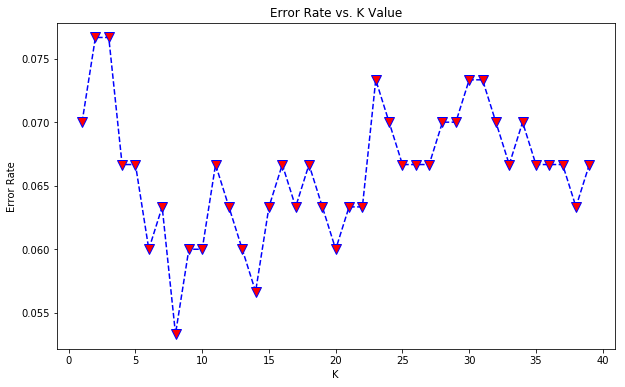

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='v',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 

In [36]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[137   9]
 [ 12 142]]


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       146
           1       0.94      0.92      0.93       154

   micro avg       0.93      0.93      0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [37]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[135  11]
 [ 11 143]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       146
           1       0.93      0.93      0.93       154

   micro avg       0.93      0.93      0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

